In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/netflix_daily_top_10.csv')

In [3]:
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


Parseando as colunas do tipo data para o formato datetime do Python

In [5]:
df['As of'] = pd.to_datetime(df['As of'])

In [7]:
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

### Tipos de dados

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[us]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   str           
 3   Last Week Rank        7100 non-null   str           
 4   Title                 7100 non-null   str           
 5   Type                  7100 non-null   str           
 6   Netflix Exclusive     4599 non-null   str           
 7   Netflix Release Date  7100 non-null   datetime64[us]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[us](2), int64(3), str(5)
memory usage: 554.8 KB


### Período da análise feita

In [10]:
df['As of'].min(), df['As of'].max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

Período de analise foi de 2 anos, iniciando no dia 01/04/2020 até 11/03/2022

### Tamanho da base de dados

In [12]:
df.shape

(7100, 10)

Temos um total de 7100 registros contendo 10 colunas de atributos

### Verificar dados nulos

In [14]:
df.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

Analisando a base foi encontrado um total de 2501 dados nulos na coluna de Netflix Exclusive

### Outliers

In [16]:
# Necessitamos remover as linhas que possuem valores null
df = df.dropna(axis=0)

Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

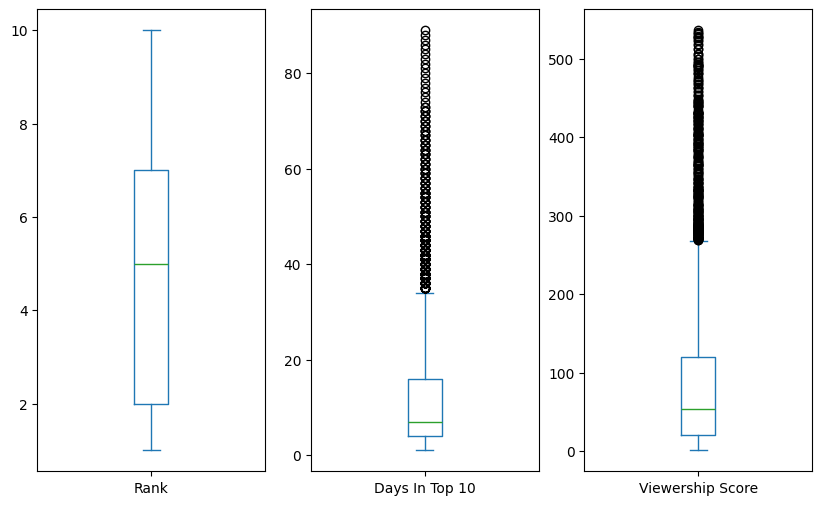

In [33]:
df.plot(kind='box', figsize=(10, 6), subplots=True)

<Axes: >

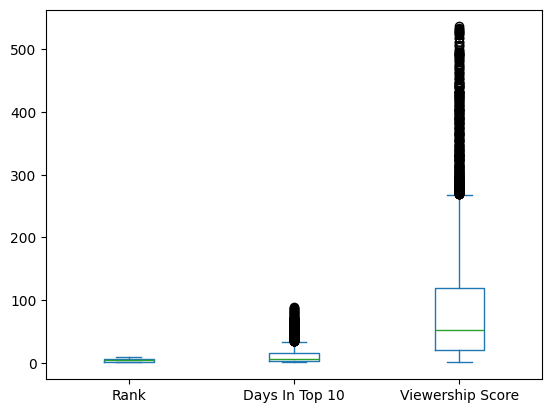

In [19]:
# Boxplot geral para analisarmos os dados
df.plot.box()

Analisando os dados vemos que temos **Outliers** nos itens de **Days In Top 10** e **Viewership Score**

In [21]:
df.sample()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
1960,2020-10-14,1,1,-,The Haunting of Bly Manor,TV Show,Yes,2020-10-09,5,49


#### Days In Top 10

Days In Top 10    Axes(0.125,0.11;0.775x0.77)
dtype: object

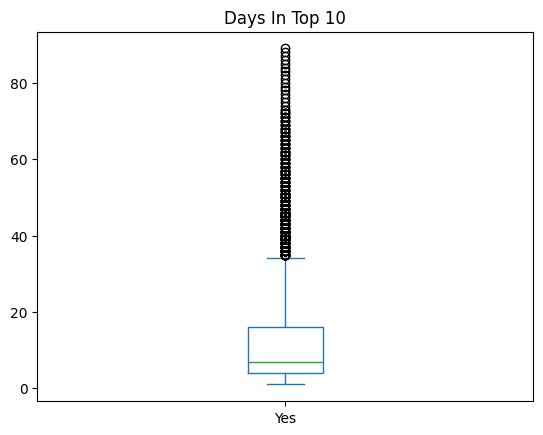

In [23]:
# Box plot agrupado por Netflix Exclusive
df.plot.box(column='Days In Top 10', by='Netflix Exclusive')

Days In Top 10    Axes(0.125,0.11;0.775x0.77)
dtype: object

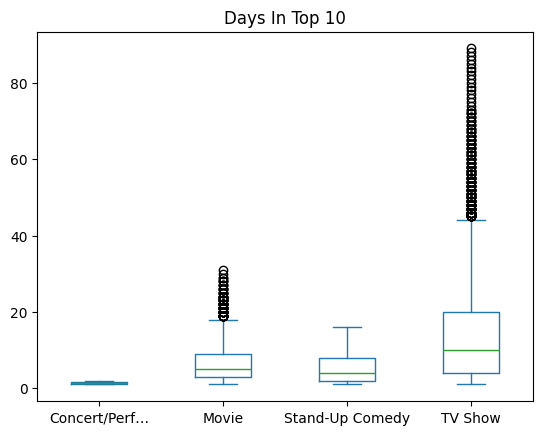

In [24]:
# Box plot agrupado por Type
df.plot.box(column='Days In Top 10', by='Type')

Ao analisar os dados, podemos ver que temos Outliers nas categorias do tipo Movie e TV Show

In [25]:
# Vamos gerar uma Dataframe pelo tipo de programa para fazermos uma analise mais detalhada
df_movie = df[df['Type'] == 'Movie']
df_tv_show = df[df['Type'] == 'TV Show']

<Axes: ylabel='Frequency'>

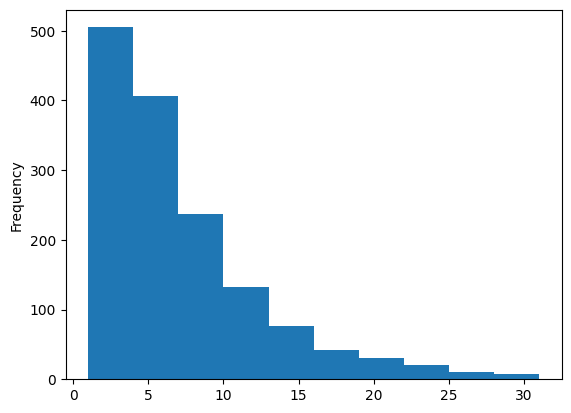

In [27]:
# Movie: Gerando hitograma para checar visualmente se seguem uma distribuição normal
df_movie['Days In Top 10'].plot.hist()

#### Viewership Score

Viewership Score    Axes(0.125,0.11;0.775x0.77)
dtype: object

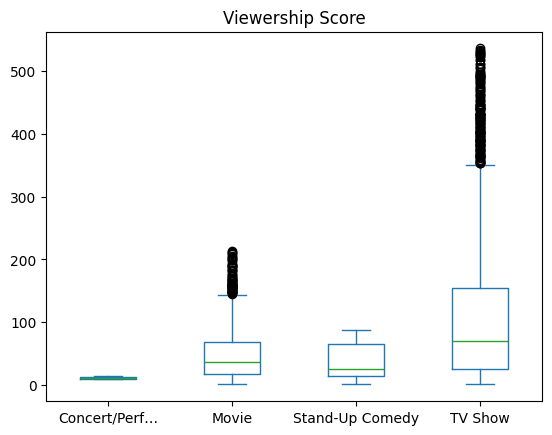

In [32]:
df.plot.box(column='Viewership Score', by='Type')